# Import

Установка основной библиотеки `transformers` и других

In [4]:
!pip install transformers sentencepiece sacremoses
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 919.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.7 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.7 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.1/1.7 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.7 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00
   -----------------

### **БАЗА**

pipeline для применения трансформеров



In [5]:
from transformers import pipeline

### Смотрим на ["Зоопарк" моделей](https://huggingface.co/models)

Можем смотреть какие есть задачи

Есть даже подробное описание [задач](https://huggingface.co/tasks)

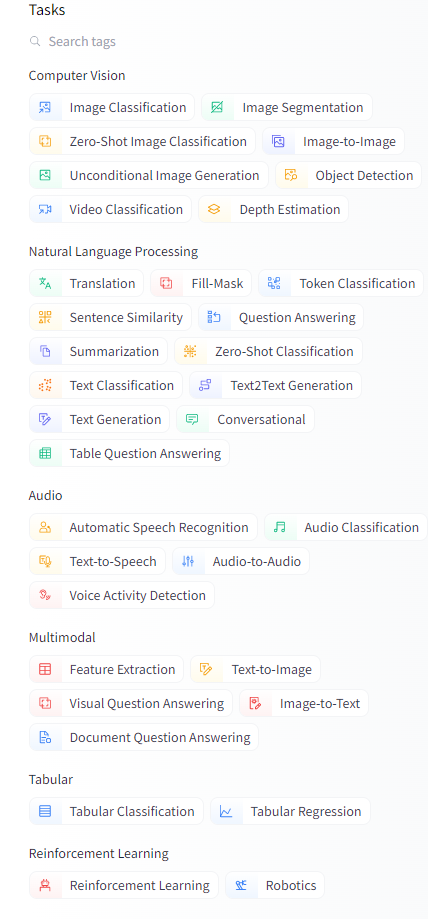

И на сами модели

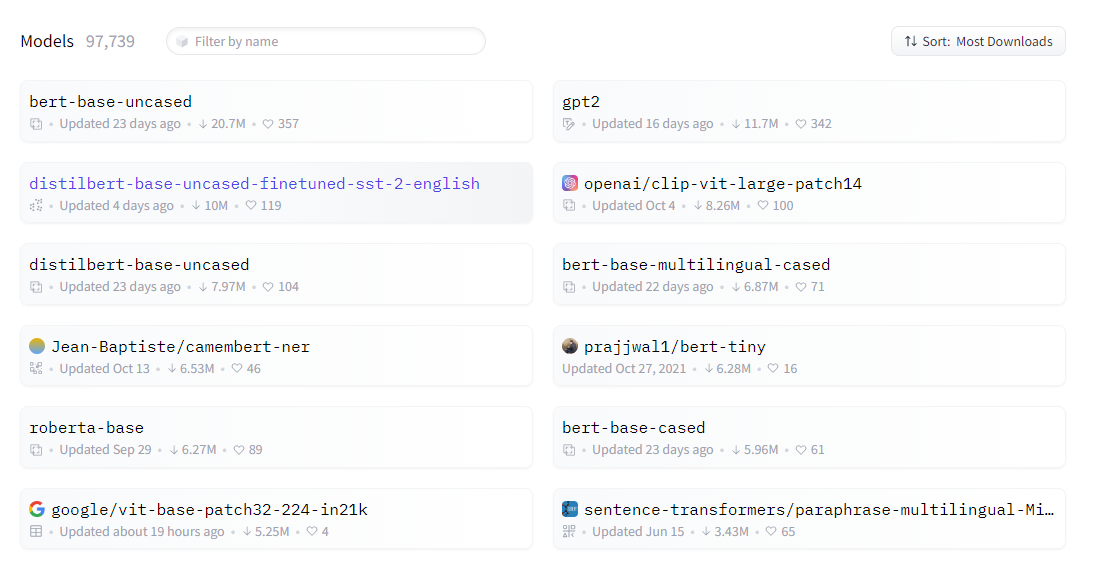

Применение достаточно простое `pipeline(Task, Model)`

# Задача [перевода](https://huggingface.co/tasks/translation)

Создаем объект `translator` как экземпляр `pipeline`

In [6]:
translator = pipeline("translation_ru_to_en",
                      "Helsinki-NLP/opus-mt-ru-en")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Применяем достаточно просто: подаем на вход строку на языке с которого переводим

В этом случае русский

In [9]:
translator("Меня зовут Станислав и я занимаюсь Машинным Обучением")

[{'translation_text': "My name is Stanislav and I'm a machine teacher."}]

In [10]:
translator("Быть или не быть вот в чем вопрос")

[{'translation_text': 'Whether or not to be is the question.'}]

# Задача анализа Тональности

Частный случай [Классификации текста](https://huggingface.co/tasks/text-classification)

In [11]:
classifier = pipeline("sentiment-analysis",
                      "distilbert-base-uncased-finetuned-sst-2-english" )

C:\Users\Killroy\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Killroy\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Hardware accelerator e.g. GPU is available in the environment, but no 

Применение такое же

In [12]:
classifier("I hate doing the homework, it's so boring \U0001f600")

[{'label': 'NEGATIVE', 'score': 0.9993295669555664}]

In [13]:
classifier("I enjoy NLP course")

[{'label': 'POSITIVE', 'score': 0.9997789263725281}]

Только для этой модели всего 2 класса

Поэтому то что трава зеленая это позитив)

In [14]:
classifier("The grass is green")

[{'label': 'POSITIVE', 'score': 0.9986151456832886}]

Можно подавать не по одному предложению, а списком предложений

In [15]:
classifier(["I hate doing the homework, it's so boring \U0001f600",
           "I enjoy NLP course",
           "The grass is green"
            ])

[{'label': 'NEGATIVE', 'score': 0.9993295669555664},
 {'label': 'POSITIVE', 'score': 0.9997789263725281},
 {'label': 'POSITIVE', 'score': 0.9986151456832886}]

# Пояснительная бригада что скрывается за pipeline

In [16]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

### Токенизатор

In [17]:
from transformers import AutoTokenizer

Загружаем токенизатор, который использовался в КОНКРЕТНОЙ модели, как объект `tokenizer`

In [18]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

### Модель

In [19]:
from transformers import AutoModelForSequenceClassification # если мы за PyTorch
from transformers import TFAutoModelForSequenceClassification # если мы за TensorFlow

Загружаем КОНКРЕТНУЮ модель, как объект `model`

In [20]:
model = TFAutoModelForSequenceClassification.from_pretrained(model_name,
                                                             from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Ну и мы можем подавать на вход модели не просто "строчку  название модели", а сам объект модель и токенизатор

В - вариативность

In [21]:
classifier2 = pipeline( task = "sentiment-analysis",
                      model = model,
                      tokenizer = tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [22]:
classifier2(["I hate doing the homework, it's so boring \U0001f600",
           "I enjoy NLP course",
           "The grass is green"])

[{'label': 'NEGATIVE', 'score': 0.9993295669555664},
 {'label': 'POSITIVE', 'score': 0.9997789263725281},
 {'label': 'POSITIVE', 'score': 0.9986151456832886}]

Результат тот же, ура, противоречий нет

## Опустимся еще на один уровень ниже и посмотрим, что получается

### Смотрим детально на Токенизатор

Предложение со смайликом :)

In [23]:
"I hate doing the homework, it's so boring \U0001f600"

"I hate doing the homework, it's so boring 😀"

Разбиваем предложение на токены - базовые элементы текста

Зависит от модели

In [24]:
tokens = tokenizer.tokenize("I hate doing the homework, it's so boring \U0001f600")
tokens

['i',
 'hate',
 'doing',
 'the',
 'homework',
 ',',
 'it',
 "'",
 's',
 'so',
 'boring',
 '[UNK]']

Затем мы переводим токены в id-шники (по сути номера слов в словаре)

In [25]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids

[1045, 5223, 2725, 1996, 19453, 1010, 2009, 1005, 1055, 2061, 11771, 100]

можно использовать объект как функцию, тогда выходом будет словарик


ну и в список id-шников добавятся токены для начала и конца предложения

In [26]:
input_ids = tokenizer("I hate doing the homework, it's so boring \U0001f600")
input_ids

{'input_ids': [101, 1045, 5223, 2725, 1996, 19453, 1010, 2009, 1005, 1055, 2061, 11771, 100, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

возвращаемся обратно от индексов к словам

In [27]:
decoded_tokens = [tokenizer.decode([token]) for token in token_ids]
decoded_tokens

['i',
 'hate',
 'doing',
 'the',
 'homework',
 ',',
 'it',
 "'",
 's',
 'so',
 'boring',
 '[UNK]']

Далее, сложим наши предложения в список

In [28]:
X_train = ["I hate doing the homework, it's so boring \U0001f600",
           "I enjoy NLP course",
           "The grass is green"]

Можем создать полноценный тензор, который уже можно подавать на вход модели

Тут мы можем задаться максимальной длиной входа

Все что больше - будет обрезано

Все что меньше - дополнится токеном, который означает "ничего"

In [29]:
batch = tokenizer(X_train,
                  padding = True,
                  truncation = True,
                  max_length = 512,
                  return_tensors = 'tf') # 'pt' если мы за pytorch

batch

{'input_ids': <tf.Tensor: shape=(3, 14), dtype=int32, numpy=
array([[  101,  1045,  5223,  2725,  1996, 19453,  1010,  2009,  1005,
         1055,  2061, 11771,   100,   102],
       [  101,  1045,  5959, 17953,  2361,  2607,   102,     0,     0,
            0,     0,     0,     0,     0],
       [  101,  1996,  5568,  2003,  2665,   102,     0,     0,     0,
            0,     0,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(3, 14), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])>}

Подаем наш батч из токенов на вход модели

`**`чтобы модель сама разобралась, что куда

In [30]:
outputs = model(**batch) # put the batched data into model
outputs

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 3.995125 , -3.3118322],
       [-4.0698476,  4.346896 ],
       [-3.1619859,  3.4188344]], dtype=float32)>, hidden_states=None, attentions=None)

Выход не очень понятный, но приведем его к понятному виду

СофтМакс наше всё

In [31]:
import tensorflow as tf

Вероятности те-же, что и уверенность модели выше

Хм...

In [32]:
predictions = tf.math.softmax(outputs.logits, axis = 1)
predictions

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[9.9932957e-01, 6.7040545e-04],
       [2.2108456e-04, 9.9977893e-01],
       [1.3847912e-03, 9.9861515e-01]], dtype=float32)>

Находим индекс максимальной вероятности

In [33]:
labels = tf.math.argmax(predictions, axis = 1)
labels

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 1], dtype=int64)>

Ну и чтобы были не просто "циферки", а "слова"

In [34]:
labels_ = [model.config.id2label[label_id] for label_id in labels.numpy().tolist()]
labels_

['NEGATIVE', 'POSITIVE', 'POSITIVE']

Итак, что делает для нас объект `pipeline`

1. Загрузка модели по имени
2. Преобразование входных данных в токены
3. Аккуратный ввод токенов в модели
4. Вывод правильных результатов модели

Давайте поблагодарим ребят, которые облегчают жизнь тем, кто не любит кодить.



# Про Embeddings

In [35]:
from transformers import TFAutoModel

Для этого подходят модели с задачами `sentence-transformers`

Загрузим новую модель и токенайзер

In [36]:
tokenizer = AutoTokenizer.from_pretrained(
	'sentence-transformers/all-MiniLM-L6-v2')
model = TFAutoModel.from_pretrained(
	'sentence-transformers/all-MiniLM-L6-v2')

C:\Users\Killroy\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Killroy\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializing the TF 2.0 m

Токенизируем вход

In [37]:
encoded_input = tokenizer(
	X_train,
	padding=True,
	truncation=True,
	max_length=128,
	return_tensors='tf')

Подаём на вход модели

Многовато размерностей

In [38]:
model_output = model(encoded_input)
model_output

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(3, 14, 384), dtype=float32, numpy=
array([[[-0.23873968,  0.24031243,  0.34789488, ...,  0.25287807,
         -0.32837877, -0.09830184],
        [ 0.00926207,  0.00577423,  0.30004475, ...,  0.30924174,
         -0.36388698, -0.51721525],
        [-0.748087  ,  0.6642407 ,  0.49496827, ...,  0.52712035,
          0.02194956,  0.572875  ],
        ...,
        [ 0.01682329, -0.12100831,  0.344335  , ...,  0.9701562 ,
         -0.22908656,  0.06937666],
        [-0.49277985, -0.43478677,  1.1546236 , ...,  0.643736  ,
         -0.32472634, -0.09822291],
        [ 0.03442792,  0.20980522,  0.46615428, ...,  0.8207941 ,
          0.69629705,  0.25089929]],

       [[ 0.26170167, -0.13887028,  0.28579667, ...,  0.2151742 ,
         -0.16419533,  0.2012031 ],
        [ 0.5525328 , -0.70996714,  0.34775105, ...,  0.46207872,
         -0.61599135, -0.5891619 ],
        [ 0.1853349 , -0.6770875 ,  0.23296672, ..

Усредним embedding всех символов в предложении (типа Bag of Words)

In [39]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = tf.cast(tf.broadcast_to(tf.expand_dims(attention_mask, -1), model_output[0].shape), tf.float32)
    sum_embeddings = tf.reduce_sum(token_embeddings * input_mask_expanded , 1)
    sum_mask = tf.reduce_sum(input_mask_expanded, 1)
    return sum_embeddings / sum_mask

In [40]:
import pandas as pd

Эта модель генерирует вектор из 384 символов

In [41]:
sentence_embeddings = mean_pooling(
	model_output,
	encoded_input['attention_mask'])

pd.DataFrame(sentence_embeddings).astype('float')

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.265083,0.248304,0.346046,0.135353,0.277380,-0.192228,0.097663,0.150023,-0.257528,0.219126,...,0.213856,-0.044495,0.176765,0.111356,-0.064295,0.322631,0.416048,0.419307,0.079847,0.274163
1,0.133544,-0.368451,0.235595,-0.019750,0.413428,0.016477,0.322563,0.169312,0.176875,0.235351,...,0.557147,0.004086,-0.310919,-0.243543,-0.491010,-0.083689,0.262675,0.345567,0.156689,0.022232
2,-0.121091,0.272157,0.007333,-0.359887,0.194158,0.118284,0.406928,-0.138338,0.347449,0.461166,...,-0.050124,-0.265685,-0.461975,0.039685,0.083573,-0.153912,-0.515101,-0.195263,0.143452,-0.022646


## Ну или можно отдельно загрузить)

In [42]:
!pip install sentence_transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/227.1 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/227.1 kB 1.4 MB/s eta 0:00:01
   ---------- ---------------------------- 61.4/227.1 kB 656.4 kB/s eta 0:00:01
   ----------------- -------------------- 102.4/227.1 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------- 227.1/227.1 kB 1.4 MB/s eta 0:00:00


In [43]:
from sentence_transformers import SentenceTransformer

In [44]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [45]:
embeddings = model.encode(X_train)

pd.DataFrame(embeddings)

C:\Users\Killroy\AppData\Roaming\Python\Python312\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.063543,0.059521,0.082951,0.032445,0.066491,-0.046079,0.023411,0.035962,-0.061732,0.052527,...,0.051263,-0.010666,0.042372,0.026693,-0.015412,0.077338,0.099731,0.100512,0.019140,0.065720
1,0.021426,-0.059114,0.037799,-0.003169,0.066330,0.002643,0.051752,0.027164,0.028378,0.037760,...,0.089389,0.000656,-0.049884,-0.039074,-0.078778,-0.013427,0.042144,0.055443,0.025139,0.003567
2,-0.019979,0.044905,0.001210,-0.059380,0.032035,0.019516,0.067141,-0.022825,0.057327,0.076090,...,-0.008270,-0.043837,-0.076224,0.006548,0.013789,-0.025395,-0.084989,-0.032217,0.023669,-0.003737


Наверное немного они по-другому усредняют )

# Задача [zero-shot-classification](https://huggingface.co/tasks/zero-shot-classification)

Классификация со "своими" классами

In [46]:
classifier = pipeline("zero-shot-classification",
                      "facebook/bart-large-mnli")

C:\Users\Killroy\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Killroy\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is p

Тут на вход и текст

И метки которые мы хотим увидеть

In [47]:
classifier("This notebook is about teaching NLP techniques which used in Hugging face platform",
           candidate_labels=["education", "art", "news","sport"])

{'sequence': 'This notebook is about teaching NLP techniques which used in Hugging face platform',
 'labels': ['education', 'news', 'sport', 'art'],
 'scores': [0.8279337286949158,
  0.09097441285848618,
  0.05510959029197693,
  0.02598220482468605]}

# Задача [генерации текста](https://huggingface.co/tasks/text-generation)

In [48]:
generator = pipeline("text-generation","gpt2")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Задаем начало и смотрим результат

In [49]:
generator("In this notebook, you will learn how to", max_new_tokens = 100)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this notebook, you will learn how to create and modify virtual machines using C++ and Rust programming language. You will also learn how to setup your own networking libraries, get started on Linux virtualization and build virtual machines on Windows Azure.\n\nHow to build your virtual machine\n\nWindows Azure is a Windows Azure Management Portal. You need Windows Azure Connect for this tutorial to run on Windows Server 2012 R2.\n\nCreate a new virtual machine with the following commands:\n\nOpen the Microsoft Azure Portal: http://www.ms'}]

# Задача [Ответы на вопросы](https://huggingface.co/tasks/question-answering)

In [50]:
question_answer = pipeline("question-answering", "distilbert-base-cased-distilled-squad")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Нужно задать вопрос и контекст в рамках которого надо ответить

In [51]:
question_answer(
    question="Where do I live?",
    context="Hi, my name is Stanislav and I live in Yekaterinburg, Russia. I work in Ural Federal University. I teach students Machine Learning"
)

{'score': 0.820763111114502,
 'start': 39,
 'end': 60,
 'answer': 'Yekaterinburg, Russia'}

In [52]:
question_answer(
    question="What do I do for a living?",
    context="Hi, my name is Stanislav and I live in Yekaterinburg, Russia. I work in Ural Federal University. I teach students Machine Learning"
)

{'score': 0.32354357838630676,
 'start': 114,
 'end': 130,
 'answer': 'Machine Learning'}

In [53]:
question_answer(
    question="What championship took place in Moscow in 2018?",
    context="Moscow (/ˈmɒskoʊ/ MOS-koh, US chiefly /ˈmɒskaʊ/ MOS-kow;[10][11] Russian: Москва, tr. Moskva, IPA: [mɐskˈva] (listen)) is the capital and largest city of Russia. The city stands on the Moskva River in Central Russia, with a population estimated at 13.0 million residents within the city limits,[5] over 17 million residents in the urban area,[12] and over 20 million residents in the metropolitan area.[13] The city covers an area of 2,511 square kilometers (970 sq mi), while the urban area covers 5,891 square kilometers (2,275 sq mi),[12] and the metropolitan area covers over 26,000 square kilometers (10,000 sq mi).[13] Moscow is among the world's largest cities; being the most populous city entirely in Europe, the largest urban and metropolitan area in Europe,[12][13] and the largest city by land area on the European continent.[14] First documented in 1147, Moscow grew to become a prosperous and powerful city that served as the capital of the Grand Duchy that bears its name. When the Grand Duchy of Moscow evolved into the Tsardom of Russia, Moscow remained the political and economic center for most of the Tsardom's history. When the Tsardom was reformed into the Russian Empire, the capital was moved from Moscow to Saint Petersburg diminishing the influence of the city. The capital was then moved back to Moscow following the October Revolution and the city was brought back as the political center of the Russian SFSR and then the Soviet Union.[15] In the aftermath of the dissolution of the Soviet Union, Moscow remained the capital city of the contemporary and newly established Russian Federation. The northernmost and coldest megacity in the world, with a history that spans eight centuries, Moscow is governed as a federal city (since 1993)[16] that serves as the political, economic, cultural, and scientific center of Russia and Eastern Europe. As an alpha world city,[17] Moscow has one of the world's largest urban economies.[18] The city is one of the fastest-growing tourist destinations in the world,[19] and is one of Europe's most visited cities. Moscow is home to the seventh-highest number of billionaires of any city in the world.[20] The Moscow International Business Center is one of the largest financial centers in Europe and the world, and features the majority of Europe's tallest skyscrapers. Moscow was the host city of the 1980 Summer Olympics, and one of the host cities of the 2018 FIFA World Cup.[21] As the historic core of Russia, Moscow serves as the home of numerous Russian artists, scientists, and sports figures due to the presence of its various museums, academic and political institutions, and theaters. The city is home to several UNESCO World Heritage Sites and is well known for its display of Russian architecture, particularly its historic Red Square, and buildings such as the Saint Basil's Cathedral and the Moscow Kremlin, of which the latter serves as the seat of power of the Government of Russia. Moscow is home to many Russian companies in numerous industries and is served by a comprehensive transit network, which includes four international airports, ten railway terminals, a tram system, a monorail system, and most notably the Moscow Metro, the busiest metro system in Europe, and one of the largest rapid transit systems in the world. The city has over 40 percent of its territory covered by greenery, making it one of the greenest cities in Europe and the world.[14][22]"
)

{'score': 0.8878558278083801,
 'start': 2429,
 'end': 2443,
 'answer': 'FIFA World Cup'}

# Задача [Вставь пропуск](https://huggingface.co/tasks/fill-mask)

In [54]:
fill_mask = pipeline("fill-mask",
                     "distilroberta-base")

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


В зависимости от модели то что считается маской варьируется от `<mask>`, до `[mask]` и `[MASK]`

In [55]:
fill_mask("<mask> was the president of the USA in 1940")

[{'score': 0.2511446177959442,
  'token': 17800,
  'token_str': ' Roosevelt',
  'sequence': ' Roosevelt was the president of the USA in 1940'},
 {'score': 0.2399967610836029,
  'token': 31037,
  'token_str': ' Eisenhower',
  'sequence': ' Eisenhower was the president of the USA in 1940'},
 {'score': 0.0882100909948349,
  'token': 31117,
  'token_str': ' Truman',
  'sequence': ' Truman was the president of the USA in 1940'},
 {'score': 0.043000947684049606,
  'token': 11625,
  'token_str': ' Reagan',
  'sequence': ' Reagan was the president of the USA in 1940'},
 {'score': 0.02538585662841797,
  'token': 43294,
  'token_str': 'Bush',
  'sequence': 'Bush was the president of the USA in 1940'}]